In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
import nltk
from textblob import TextBlob

In [2]:
#pip install openpyxl

In [3]:
df=pd.read_excel("C:/Users/priyamboda.ghosh/Desktop/Priyamboda-Personal/Personal/Data Science/ML Projects for Portfolio/Merchandise Sales/MerchandiseSales.xlsx",sheet_name="Data")
df.head(5)

Order ID Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    122294 2023-11-05     BF1543         Clothing         Male         24   
1    122496 2023-11-05     BF1552        Ornaments         Male         22   
2    123014 2023-11-05     BF1546         Clothing       Female         21   
3    123784 2023-11-05     BF1551        Ornaments       Female         20   
4    124705 2023-11-05     BF1555            Other       Female         35   

  Order Location  Latitude   Longitude International Shipping  Sales Price  \
0  San Francisco  37.77493 -122.419420                     No          100   
1       Portland  45.52340 -122.676210                     No           45   
2      New Delhi  28.64480   77.216721                    Yes          118   
3       Portland  45.52340 -122.676210                     No           15   
4       New York  40.73061  -73.935242                     No           23   

   Shipping Charges  Sales per Unit  Quantity  Total Sales  Rating  \
0                 0             100         1          100       4   
1                 0              45         1           45       5   
2                70             188         1          188       3   
3                 0              15         1           15       4   
4                 0              23         1           23       3   

                                              Review  
0                 The product had excellent quality.  
1  Great design is one of the major positives of ...  
2  Had slight delays but the product was in good ...  
3            Discount deals was greatly appreciated.  
4  Had slight delays but the product was in good ...

In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Product ID', 'Product Category',
       'Buyer Gender', 'Buyer Age', 'Order Location', 'Latitude', 'Longitude',
       'International Shipping', 'Sales Price', 'Shipping Charges',
       'Sales per Unit', 'Quantity', 'Total Sales', 'Rating', 'Review'],
      dtype='object')

In [5]:
var_list={}
for c in df['Product Category'].unique():
    for s in df['International Shipping'].unique():
        var='Category: '+c+', Shipping: '+s
        print(var)
        str=''
        for l in (df[(df['Product Category']==c) & (df['International Shipping']==s)]['Review']):
            str = str + l
        str = re.sub(r',[,|.|?|!|;|"|@|#|$|%|^|&|*|(|)|_|-|+|=|{|}|:|/]','',str)
        str = re.sub(r'[^a-z A-Z]',r' ',str)
        str = str.lower()
        var_list[var]=str


Category: Clothing, Shipping: No
Category: Clothing, Shipping: Yes
Category: Ornaments, Shipping: No
Category: Ornaments, Shipping: Yes
Category: Other, Shipping: No
Category: Other, Shipping: Yes


In [6]:
#print(var_list['v_Clothing_No'])

In [7]:
#print(var_list['v_Other_Yes'])

In [8]:
#pip install wordcloud

In [9]:
#pip install nltk

In [10]:
#nltk.download('brown')
#nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to D:\Python\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
#pip install textblob

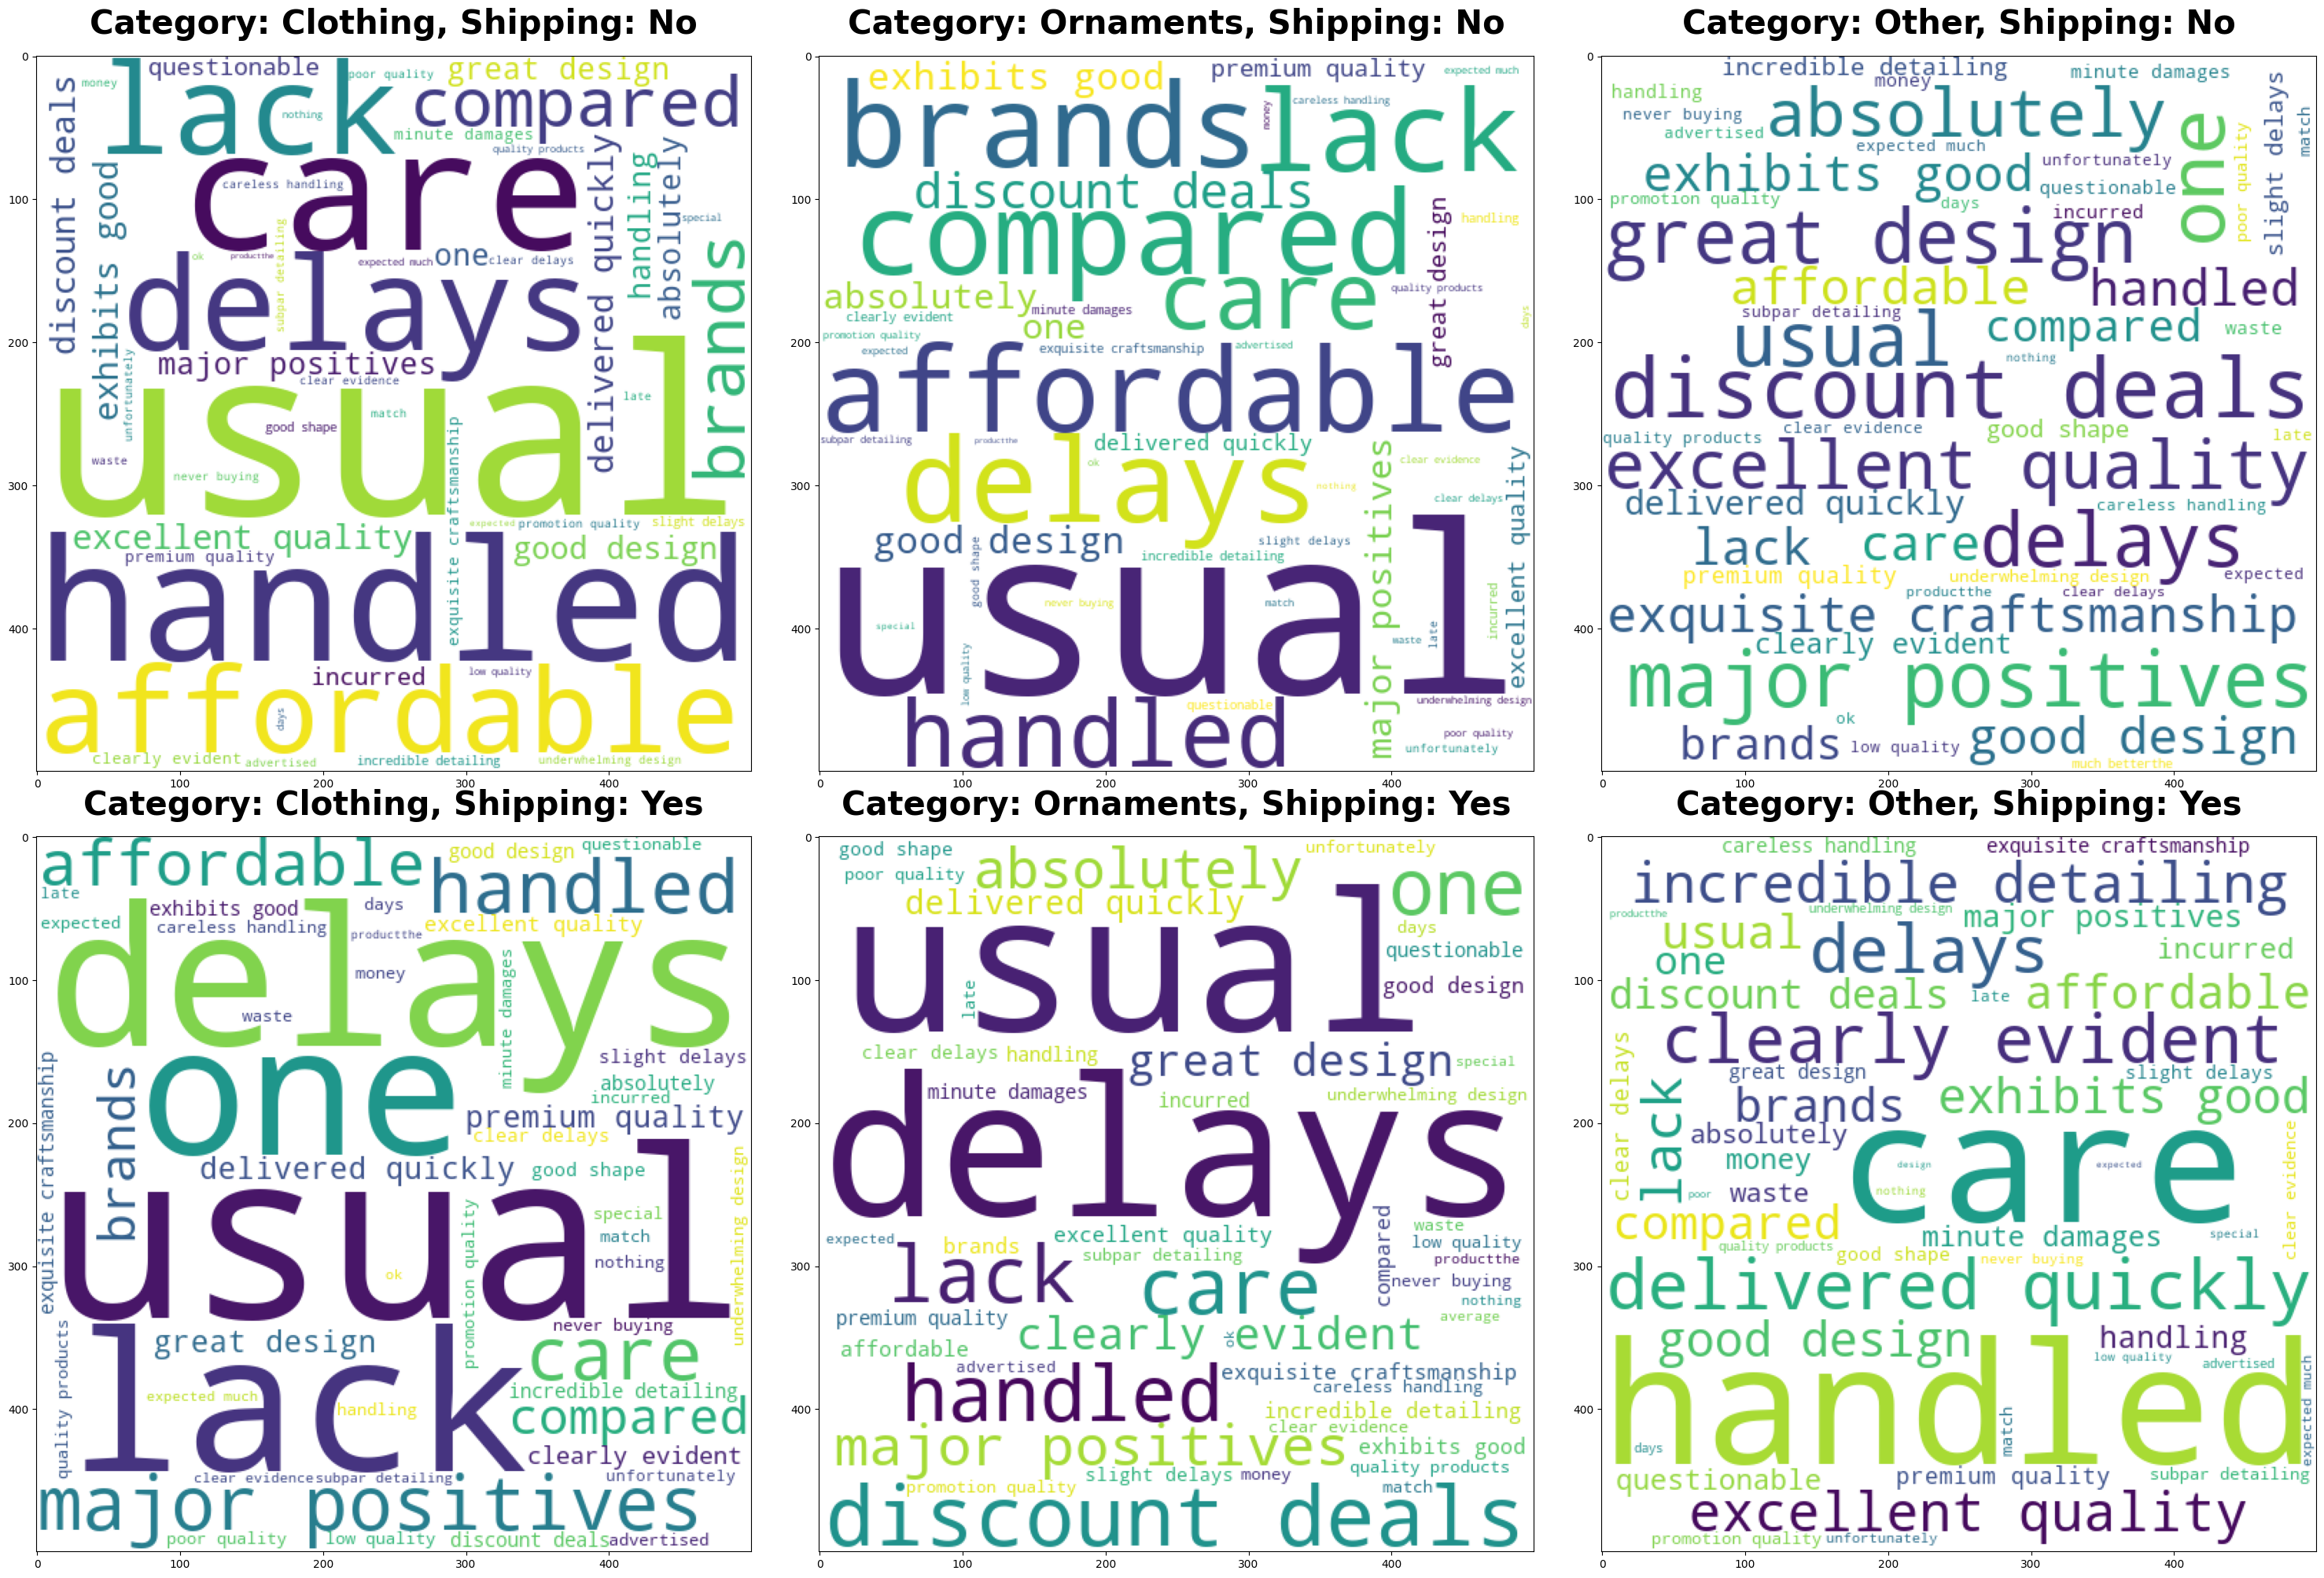

<Figure size 640x480 with 0 Axes>

In [12]:
rows=2
cols=3
fig,plot=plt.subplots(nrows=rows, ncols=cols,figsize=(30,20))
r=0 
c=0
custom_stopwords=list(STOPWORDS) + ['product','greatly', 'appreciated','delivery', 'team']
for i in var_list.keys():
    #wordlist=var_list[i].split()
    wordcloudimage = WordCloud(max_words=50,
                               background_color='white',
                               contour_color='black',
                               stopwords=custom_stopwords,
                               font_step=2, 
                               max_font_size=300,
                               height=500,
                               width=500).generate(var_list[i])
    plot[r,c].set_title(i,fontsize=30, pad=20, fontweight='bold')
    plot[r,c].imshow(wordcloudimage,)
    #print(r,c, i)
    if r == (rows -1):
        c+=1
        r=0
    else:
        r+=1
    

plt.tight_layout()
plt.show()
plt.savefig('C:/Users/priyamboda.ghosh/Desktop/Priyamboda-Personal/Personal/Data Science/ML Projects for Portfolio/Merchandise Sales/WordCloudImage.png')

## Press 'Shift' + right click --> Get option as 'Save Image As..'


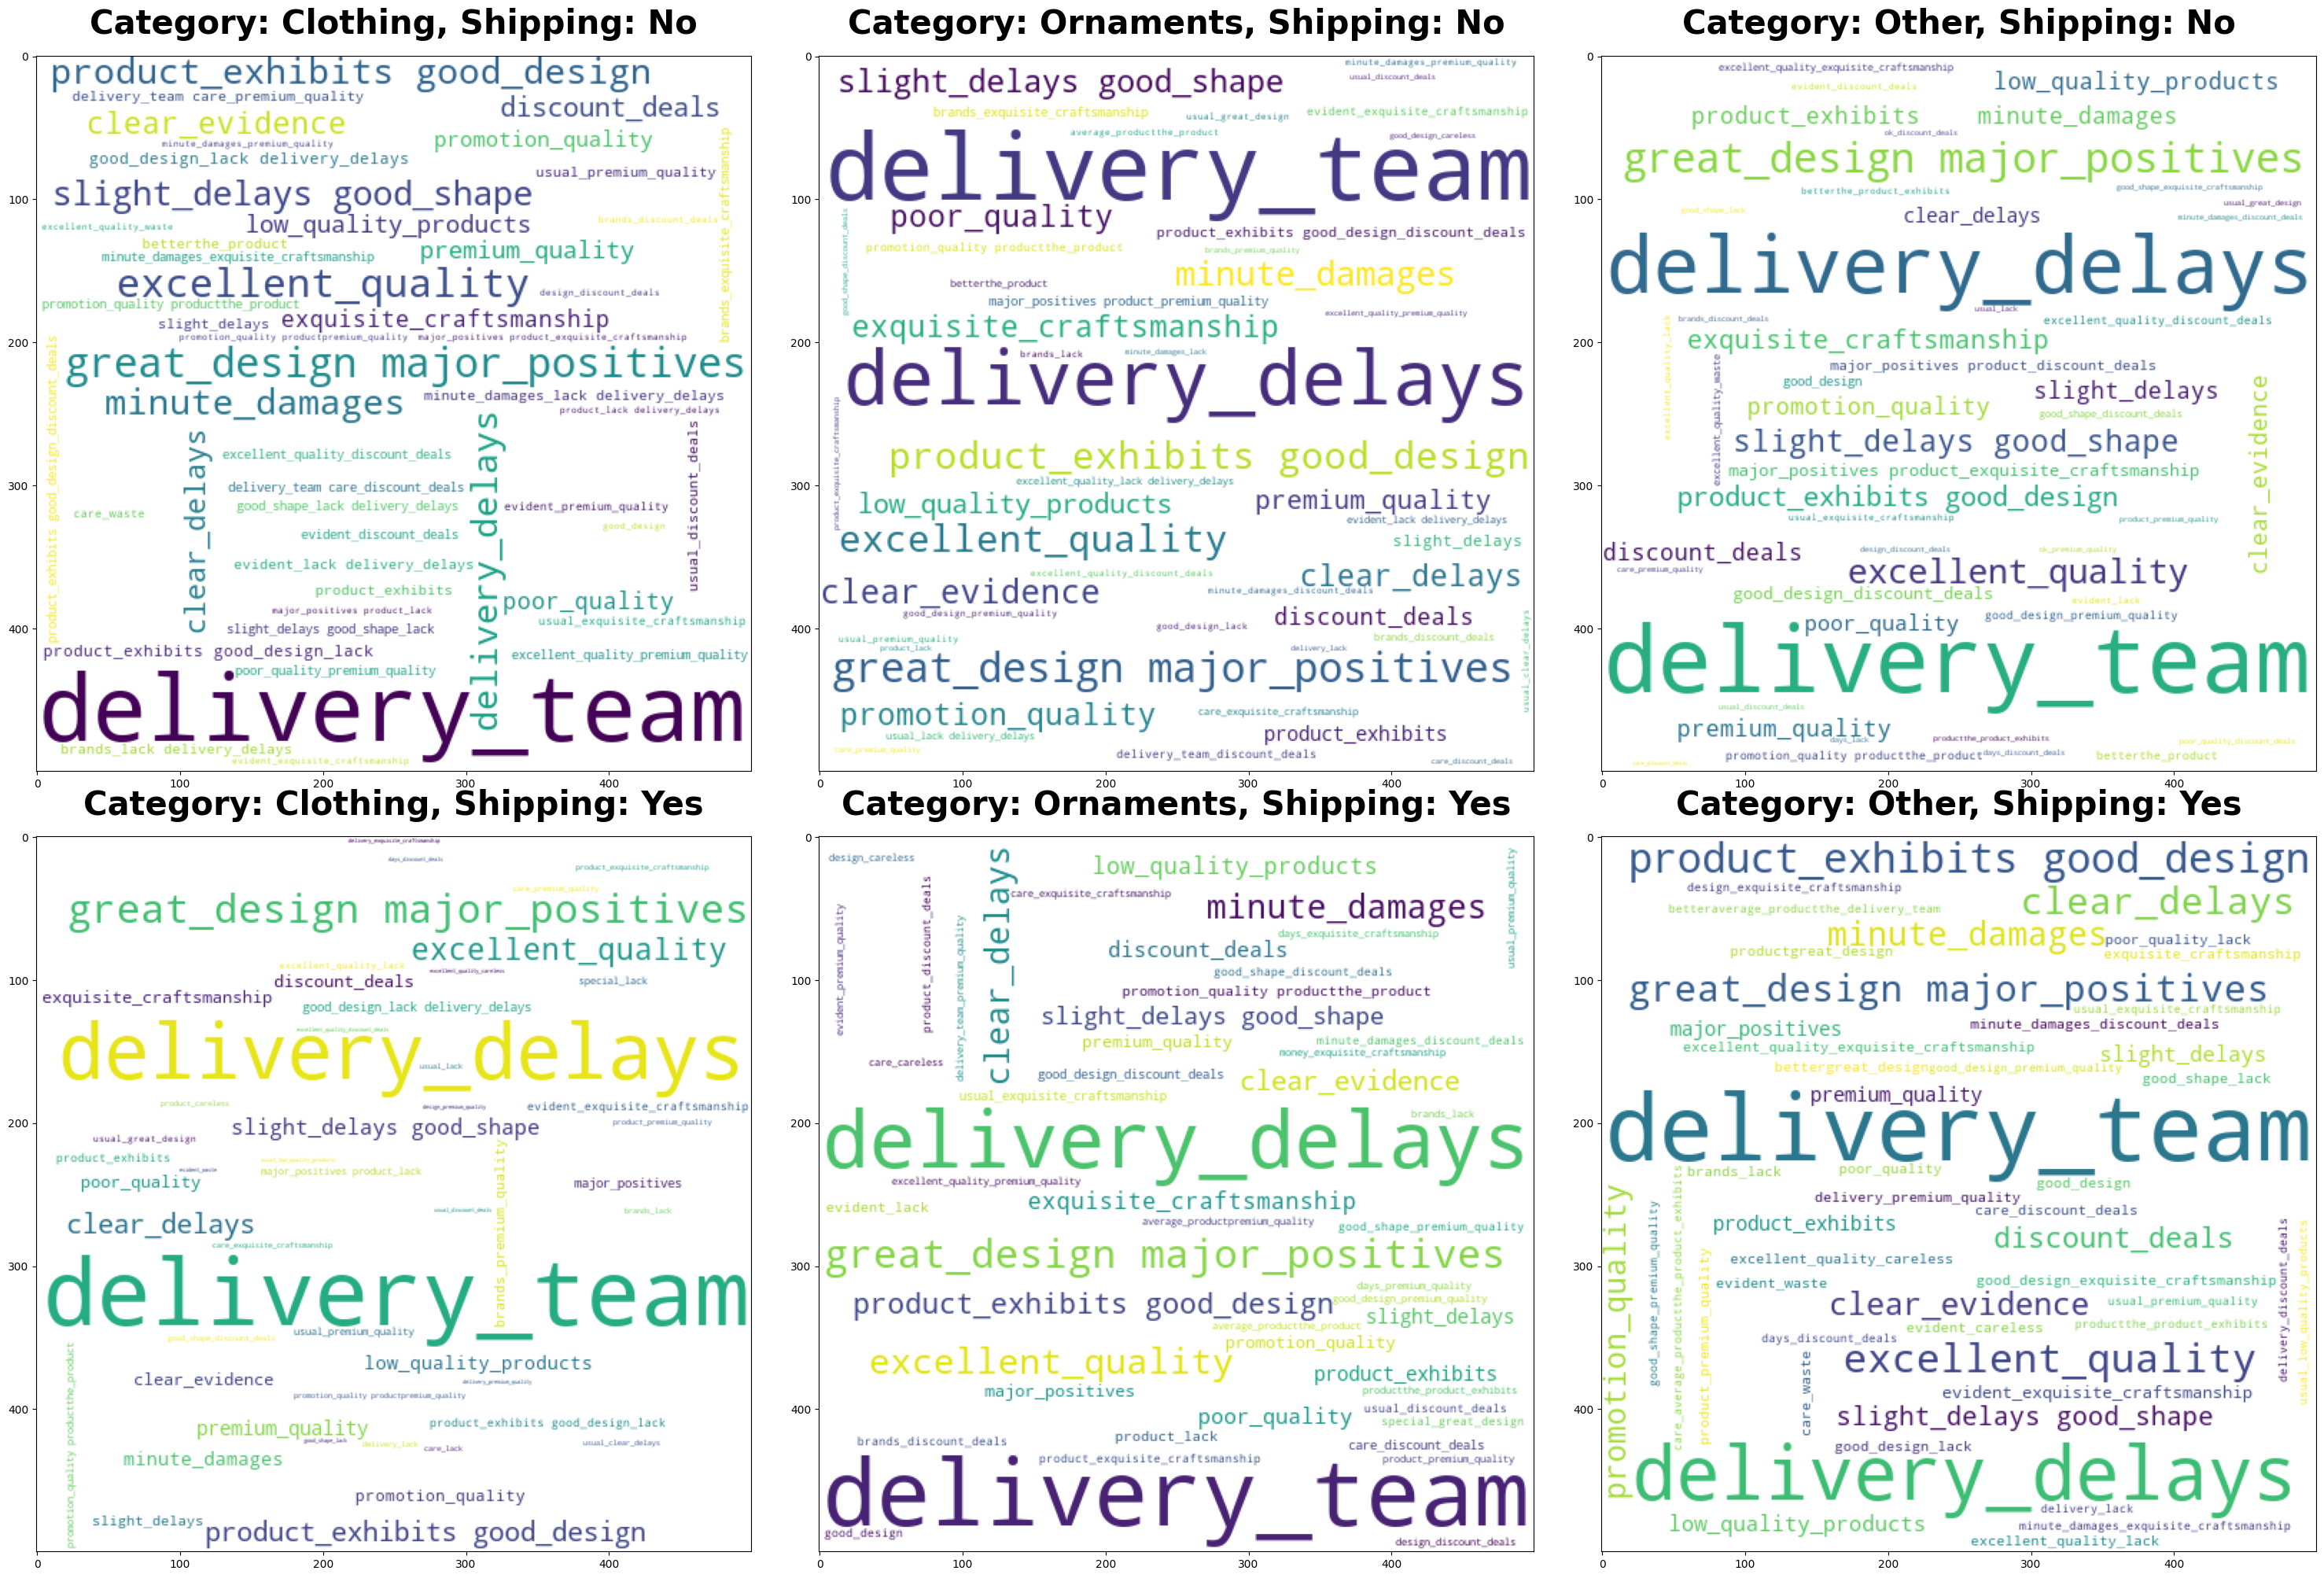

<Figure size 640x480 with 0 Axes>

In [13]:
rows=2
cols=3
fig,plot=plt.subplots(nrows=rows, ncols=cols,figsize=(30,20))
r=0 
c=0
custom_stopwords=list(STOPWORDS) #+ ['product']               #,'greatly', 'appreciated','delivery', 'team']
#long_string=''
for i in var_list.keys():
    #wordlist=var_list[i].split()
    noun_phrases=TextBlob(var_list[i]).noun_phrases
    #print(noun_phrases)
    word_list=''
    for w in noun_phrases:
        w = w.replace(" ","_")
        word_list=word_list + " " + w
    #print(i,"\n",word_list)
    
    wordcloudimage = WordCloud(max_words=50,
                               background_color='white',
                               contour_color='black',
                               stopwords=custom_stopwords,
                               font_step=2, 
                               max_font_size=300,
                               height=500,
                               width=500).generate(word_list)
        
    plot[r,c].set_title(i,fontsize=30, pad=20, fontweight='bold')
    plot[r,c].imshow(wordcloudimage,)
    #print(r,c, i)
    if r == (rows -1):
        c+=1
        r=0
    else:
        r+=1
    

plt.tight_layout()
plt.show()
plt.savefig('C:/Users/priyamboda.ghosh/Desktop/Priyamboda-Personal/Personal/Data Science/ML Projects for Portfolio/Merchandise Sales/WordCloudImage.png')

## Press 'Shift' + right click --> Get option as 'Save Image As..'


In [14]:
def polarity_score(text):
    polarity_score = TextBlob(text).sentiment[0]
    #subjectivity_score = TextBlob(text).sentiment[1]
    return polarity_score

def subjectivity_score(text):
    #polarity_score = TextBlob(text).sentiment[0]
    subjectivity_score = TextBlob(text).sentiment[1]
    return subjectivity_score

df['Polarity']=df['Review'].apply(polarity_score)
df['Subjectivity']=df['Review'].apply(subjectivity_score)
df.head(5)

Order ID Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    122294 2023-11-05     BF1543         Clothing         Male         24   
1    122496 2023-11-05     BF1552        Ornaments         Male         22   
2    123014 2023-11-05     BF1546         Clothing       Female         21   
3    123784 2023-11-05     BF1551        Ornaments       Female         20   
4    124705 2023-11-05     BF1555            Other       Female         35   

  Order Location  Latitude   Longitude International Shipping  Sales Price  \
0  San Francisco  37.77493 -122.419420                     No          100   
1       Portland  45.52340 -122.676210                     No           45   
2      New Delhi  28.64480   77.216721                    Yes          118   
3       Portland  45.52340 -122.676210                     No           15   
4       New York  40.73061  -73.935242                     No           23   

   Shipping Charges  Sales per Unit  Quantity  Total Sales  Rating  \
0                 0             100         1          100       4   
1                 0              45         1           45       5   
2                70             188         1          188       3   
3                 0              15         1           15       4   
4                 0              23         1           23       3   

                                              Review  Polarity  Subjectivity  
0                 The product had excellent quality.  1.000000      1.000000  
1  Great design is one of the major positives of ...  0.431250      0.625000  
2  Had slight delays but the product was in good ...  0.266667      0.383333  
3            Discount deals was greatly appreciated.  0.200000      0.100000  
4  Had slight delays but the product was in good ...  0.266667      0.383333

In [56]:
df.groupby(['Product Category'])['Polarity'].agg(['mean'])

mean
Product Category          
Clothing          0.170445
Ornaments         0.160340
Other             0.198436

In [16]:
df.pivot_table(index=['Product Category','International Shipping'],columns='Rating',values='Polarity',aggfunc='mean')

Rating                                          1         2         3  \
Product Category International Shipping                                 
Clothing         No                     -0.112372 -0.139516  0.083058   
                 Yes                    -0.120833 -0.115132  0.095853   
Ornaments        No                     -0.143574 -0.140230  0.068628   
                 Yes                    -0.134459 -0.117361  0.054250   
Other            No                     -0.143421 -0.121717  0.109347   
                 Yes                    -0.127692 -0.130189  0.071805   

Rating                                          4         5  
Product Category International Shipping                      
Clothing         No                      0.307708  0.333568  
                 Yes                     0.291250  0.298079  
Ornaments        No                      0.320437  0.314439  
                 Yes                     0.309975  0.353955  
Other            No                      0.356959  0.331721  
                 Yes                     0.367163  0.311285

<Axes: xlabel='Rating', ylabel='Product Category-International Shipping'>

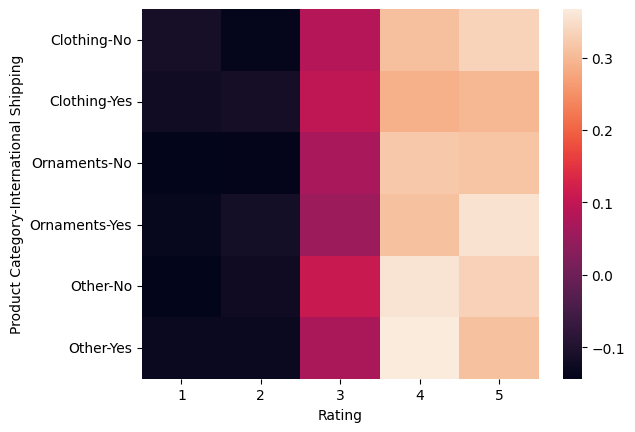

In [17]:
sns.heatmap(data=df.pivot_table(index=['Product Category','International Shipping'],columns='Rating',values='Polarity',aggfunc='mean'))

<Axes: xlabel='International Shipping', ylabel='Product Category'>

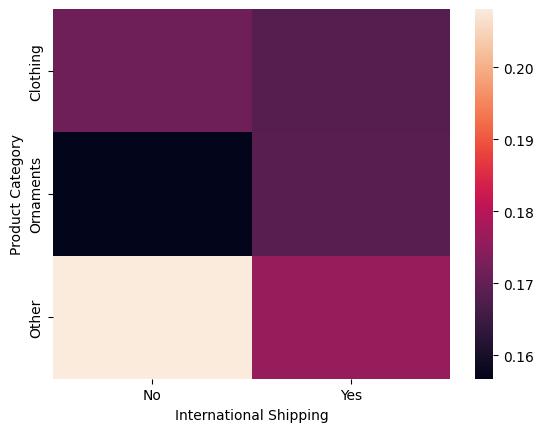

In [19]:
sns.heatmap(data=df.pivot_table(index=['Product Category'],columns='International Shipping',values='Polarity',aggfunc='mean'))